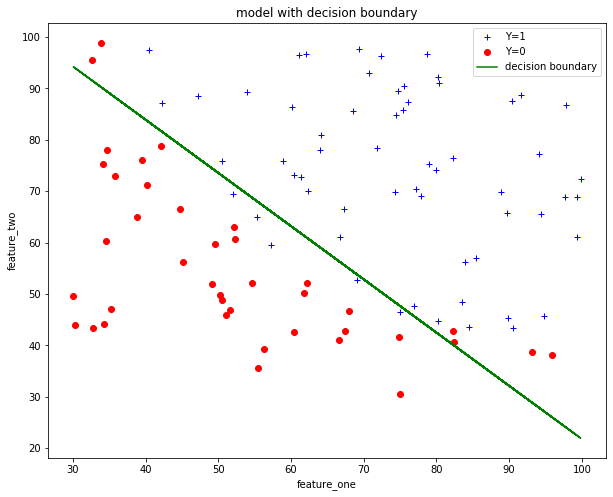

/home/jame/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


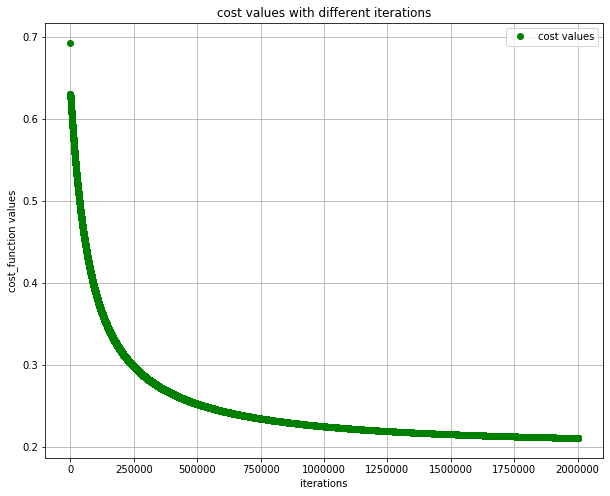

In [236]:
import numpy as np
import matplotlib.pyplot as plt

#读取数据，建立X，Y矩阵
trainingset = 'data/ex2data1.txt'
cols=np.loadtxt(trainingset,delimiter=',',unpack=True,usecols=(0,1,2))
mask1=np.transpose(cols)[:,2]==1#找出第三列为1的所有训练数据
mask2=np.transpose(cols)[:,2]==0#找出第三列为0的所有训练数据
colstrue=np.transpose(np.array(cols[:,mask1]))#将训练集中数据进行初步划分，划分出标签值为1和标签值为0的训练数据
colsfalse=np.transpose(np.array(cols[:,mask2]))
m=cols.shape[1]
y=np.transpose(np.array(cols[2:3]))#y矩阵取第三行所有列，为1xm，后进行转置,变为mx1向量
x=np.transpose(np.array(cols[0:2]))#x矩阵取第一行，第二行所有列，为2xm，后进行转置，变为mxn向量
x=np.insert(x,0,1,axis=1)#向x插入1列全为1的常数列在第一列的位置上
#初步分析数据,进行对比，
def plot_trianing_data():
    plt.figure(figsize=(10,6))
    plt.plot(colstrue[:,0],colstrue[:,1],'b+')
    plt.plot(colsfalse[:,0],colsfalse[:,1],'r*')
    plt.title("Trianing Data")
    plt.xlabel('feature_one')
    plt.ylabel('feature_two')
    plt.grid(False)
    #plt.show()
    
#sigmod函数建立
def sigmod(z):
    return 1/(1+np.exp(-z))
#显示sigmod函数图像以及性质
def plot_sigmod():
    z=np.arange(-10,10,1)
    plt.plot(z,sigmod(z))
    plt.title("sigmod function figure")
    plt.grid(True)
    #plt.show()

#假设函数Hypothesis建立
def hypothesis(theta,X):
    return sigmod(np.dot(X,theta))

#逻辑回归的损失函数建立
def CostFunction(theta,X,Y):
    matrix_one=np.full((m,1),1)
    ep=1e-20
    epmatrix=np.full((m,1),ep)
    #J_theta=float(-1/m*(np.sum(Y*np.log(hypothesis(theta,X)+epmatrix)+(1-Y)*np.log(1-hypothesis(theta,X)+epmatrix))))
    J_theta=-1/m*np.sum(np.multiply(Y,np.log(hypothesis(theta,X)))+np.multiply(1-Y,np.log(1-hypothesis(theta,X))))
    #J_theta=float(-1/m*np.sum((np.multiply(Y.T,np.log(hypothesis(theta,X)))+np.multiply((matrix_one-Y.T),np.log(matrix_one.T-hypothesis(theta,X))))))
    return float(J_theta)

def git_cost(theta,X,Y,mylambda=0):
    ep=1
    term1 = np.dot(-np.array(Y).T,np.log(hypothesis(theta,X)+ep))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-hypothesis(theta,X)+ep))
    regterm = (mylambda/2) * np.sum(np.dot(theta[1:].T,theta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

#初始化theta向量的值，并且初始化梯度下降的学习率以及迭代次数
init_alpha = 0.00001
iterations = 2000000
init_theta = np.zeros((x.shape[1],1))

#实现梯度下降函数，分别记录不同的历史theta取值，以及损失函数取值
def Gradient_descent(theta,X,Y,init_alpha,iterations):
    theta_List=[]
    Cost_List=[]
    for nums in range(iterations):
        temp_theta=theta
        theta_List.append(temp_theta)
        Cost_List.append(float(format(CostFunction(temp_theta,X,Y),'.5f')))
        for j in range(len(temp_theta)):
            temp_theta[j]=theta[j]-init_alpha*np.sum((hypothesis(theta,X)-Y)*np.array(X[:,j]).reshape(X.shape[0],1))
        theta=temp_theta
    return theta,theta_List,Cost_List
            
#根据最后得到的theta值，计算出相对应的损失函数的值
def get_final_cost_values(theta,X,Y):
    return CostFunction(theta,X,Y)

#根据得到的theta值，建立相应逻辑回归模型,并划分决策边界，通过h(x)=0.5进行划分,该模型即为决策边界
def model(theta,xvals):
    model_predict=-(theta[1]/theta[2])*xvals-(theta[0]/theta[2])
    return model_predict

#plot_trianing_data()
final_theta,final_theta_list,final_cost_list = Gradient_descent(init_theta,x,y,init_alpha,iterations)
final_cost=get_final_cost_values(final_theta,x,y)
   
#将模型对应预测值与训练集数据对比，并可视化
def plot_model_with_decision_boundary():
    plt.figure(figsize=(10,8))
    plt.grid(False)
    plt.plot(colstrue[:,0],colstrue[:,1],'b+',label='Y=1')
    plt.plot(colsfalse[:,0],colsfalse[:,1],'ro',label='Y=0')
    plt.plot(x[:,1],model(final_theta,x[:,1]),'g-',label='decision boundary')
    plt.title("model with decision boundary")
    plt.xlabel('feature_one')
    plt.ylabel('feature_two')
    plt.legend()
    #plt.show()
    
#分别展示不同迭代次数下的历史损失函数大小
def plot_cost(final_cost_list):
    plt.figure(figsize=(10,8))
    plt.grid(True)
    #plt.xlim([1,400])
    #plt.ylim([0,1])
    plt.plot(final_cost_list,'go',label='cost values')
    plt.title("cost values with different iterations")
    plt.xlabel('iterations')
    plt.ylabel('cost_function values')
    plt.legend()
    
    
#plot_model_with_decision_boundary()
#plot_cost(final_cost_list)
#plot_sigmod()

In [48]:
x.shape[1]

3

In [237]:
final_cost_list[-1]

0.21041

In [6]:
CostFunction(init_theta,x,y)

0.21041217159092934

In [5]:
final_cost_list

[0.69315,
 0.63001,
 0.62996,
 0.62991,
 0.62988,
 0.62985,
 0.62983,
 0.62982,
 0.62981,
 0.6298,
 0.62979,
 0.62978,
 0.62977,
 0.62977,
 0.62976,
 0.62976,
 0.62975,
 0.62975,
 0.62974,
 0.62973,
 0.62973,
 0.62972,
 0.62972,
 0.62971,
 0.62971,
 0.62971,
 0.6297,
 0.6297,
 0.62969,
 0.62969,
 0.62968,
 0.62968,
 0.62967,
 0.62967,
 0.62966,
 0.62966,
 0.62965,
 0.62965,
 0.62964,
 0.62964,
 0.62963,
 0.62963,
 0.62962,
 0.62962,
 0.62961,
 0.62961,
 0.6296,
 0.6296,
 0.62959,
 0.62959,
 0.62958,
 0.62958,
 0.62957,
 0.62957,
 0.62956,
 0.62956,
 0.62955,
 0.62955,
 0.62954,
 0.62954,
 0.62953,
 0.62953,
 0.62952,
 0.62952,
 0.62951,
 0.62951,
 0.62951,
 0.6295,
 0.6295,
 0.62949,
 0.62949,
 0.62948,
 0.62948,
 0.62947,
 0.62947,
 0.62946,
 0.62946,
 0.62945,
 0.62945,
 0.62944,
 0.62944,
 0.62943,
 0.62943,
 0.62942,
 0.62942,
 0.62941,
 0.62941,
 0.6294,
 0.6294,
 0.62939,
 0.62939,
 0.62938,
 0.62938,
 0.62937,
 0.62937,
 0.62936,
 0.62936,
 0.62935,
 0.62935,
 0.62934,
 0.62934,

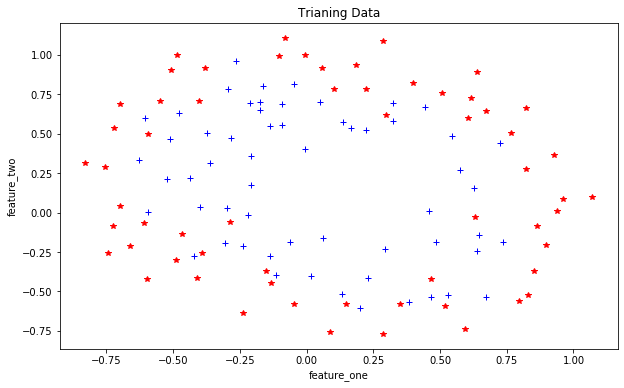

In [238]:
#进行数据线性不可分的逻辑回归分类器构建
#首先读取数据
import numpy as np
import matplotlib.pyplot as plt
trainingset2 = 'data/ex2data2.txt'
cols2=np.loadtxt(trainingset2,delimiter=',',unpack=True,usecols=(0,1,2))
mask3=np.transpose(cols2)[:,2]==1#找出第三列为1的所有训练数据
mask4=np.transpose(cols2)[:,2]==0#找出第三列为0的所有训练数据
colstrue2=np.transpose(np.array(cols2[:,mask3]))#将训练集中数据进行初步划分，划分出标签值为1和标签值为0的训练数据
colsfalse2=np.transpose(np.array(cols2[:,mask4]))
m2=cols2.shape[1]
y2=np.transpose(np.array(cols2[2:3]))#y矩阵取第三行所有列，为1xm，后进行转置,变为mx1向量
x2=np.transpose(np.array(cols2[0:2]))#x矩阵取第一行，第二行所有列，为2xm，后进行转置，变为mxn向量
x2=np.insert(x2,0,1,axis=1)#向x插入1列全为1的常数列在第一列的位置上
#初步分析数据,进行对比，
def plot_trianing_data_2():
    plt.figure(figsize=(10,6))
    plt.plot(colstrue2[:,0],colstrue2[:,1],'b+')
    plt.plot(colsfalse2[:,0],colsfalse2[:,1],'r*')
    plt.title("Trianing Data")
    plt.xlabel('feature_one')
    plt.ylabel('feature_two')
    plt.grid(False)
    #plt.show()
#sigmod函数建立
def sigmod(z):
    return 1/(1+np.exp(-z))
plot_trianing_data_2()

In [281]:
#构建两个特征的特征多项式函数
def PolynomialFeatures(degree,X1,X2):
    #degree代表特征多项式的深度，X1，X2分别代表该特征多项式的两个特征矩阵，分别为mx1矩阵
    #初始化准备输出的矩阵out，初始化维度为（m，1）,取值为一个全为1的列向量
    out = np.ones((X1.shape[0],1))
    #进行迭代，能得到（1，X1，X2，X1的平方，X1×X2，...）等m行未知列的矩阵，即特征多项式矩阵
    for i in range(1,degree+1):
        for j in range(0,i+1):
            term1 = X1**(i-j)#**代表求幂次
            term2 = X2**(j)
            term = np.array(term1*term2).reshape(term1.shape[0],1)#每一次得到的term也是m行1列
            out = np.hstack((out,term))#term以行普展，相当于每一次只增加列数不增加行数
    return out
#进行测试该特征多项式函数
#print(x2[:,1:3])
de=6
Polymial_X=PolynomialFeatures(de,x2[:,1],x2[:,2])#初始设置深度，得到新的特征多项式矩阵
print(Polymial_X.shape)

(118, 28)


In [327]:
#根据新的特征多项式矩阵的维度，设置新的theta向量
new_theta=np.zeros((Polymial_X.shape[1],1))
#设置梯度下降迭代次数与学习率
new_iteration=2000000
new_alpha=0.001

CostFunction(new_theta,Polymial_X,y2)#得到初始theta下的损失函数值

0.8179136730607356

/home/jame/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


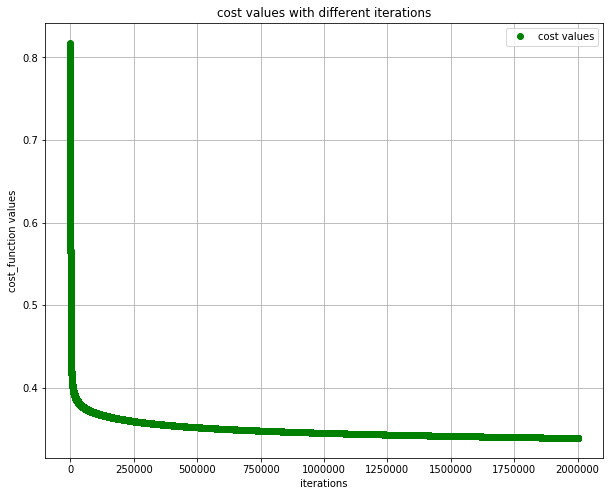

In [328]:
#然后进行对应参数的梯度下降
new_f_theta,new_f_thetaList,new_CostList=Gradient_descent(new_theta,Polymial_X,y2,new_alpha,new_iteration)
#观察梯度下降过程中损失函数的变化值，以初步确定是否梯度下降成功
plot_cost(new_CostList)
#print(new_CostList[-1])
#print(Polymial_X.shape)
#print(new_f_theta.shape)
#print(np.dot(Polymial_X,new_f_theta).shape)
#print(np.array(x2[:,2].reshape((118,1))).shape)

(28, 1)


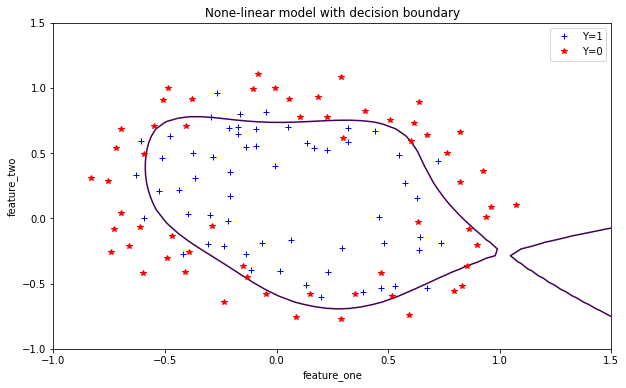

In [329]:
#plot绘画函数方程使用plt.contour(x,y,z,0)方法，例如计算x**2+y**2=1,
#令z=x**2+y**2-1，要保证x，y，z维度相同
#然后依次代入参数
def new_plot():
    plt.figure(figsize=(10,6))
    x3=np.linspace(-1,1.5,50)
    x4=np.linspace(-1,1.5,50)
    z = np.zeros((len(x3),len(x4)))
    print(new_f_theta.shape)
    for i in range(len(x3)):
        for j in range(len(x4)):
            k=PolynomialFeatures(de,np.array([x3[i]]),np.array([x4[j]]))
            #print(k.shape)
            z[i][j]=np.dot(k,new_f_theta)
    #z=z.transpose()
    x_3,x_4=np.meshgrid(x3,x4)
    contour = plt.contour(x_3,x_4,z,[0])
    plt.title('None-linear model with decision boundary')
    plt.xlabel('feature_one')
    plt.ylabel('feature_two')
    plt.plot(colstrue2[:,0],colstrue2[:,1],'b+',label='Y=1')
    plt.plot(colsfalse2[:,0],colsfalse2[:,1],'r*',label='Y=0')
    plt.legend()
#x3=np.transpose(np.array(x2[:,1].reshape((x2.shape[0],1))))
#x4=np.transpose(np.array(x2[:,2].reshape((x2.shape[0],1))))
new_plot()


In [330]:
new_CostList[-1]

0.3389